# K-Means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('seaborn-v0_8')

In [4]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"
os.environ["OMP_NUM_THREADS"] = "4"

## Generate Data

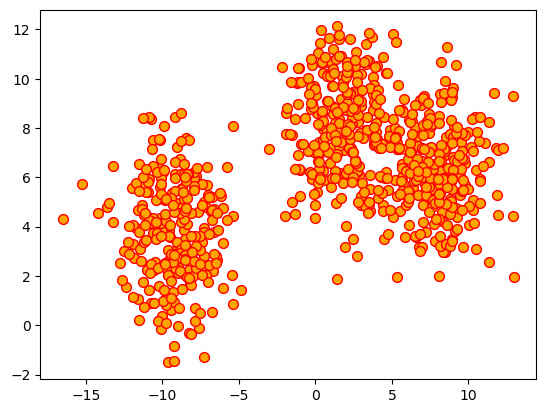

In [27]:
# create dataset
X, _ = make_blobs(n_samples=800, n_features=2,
                  centers=3, cluster_std=1.9,
                  shuffle=True, random_state=20)

# plot
plt.scatter(X[:, 0], X[:, 1], c='orange', edgecolor='red', marker='o', s=50)

plt.show()

## Model Data

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', max_iter=300, random_state=20)
y_km = km.fit_predict(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [7]:
preview_cluster_data = pd.DataFrame({
    'centroid pada fitur 1 (sumbu x)':km.cluster_centers_[:,0],
    'centroid pada fitur 2 (sumbu y)':km.cluster_centers_[:,1],
    'cluster':list(range(3))
})
preview_cluster_data

,centroid pada fitur 1 (sumbu x),centroid pada fitur 2 (sumbu y),cluster
0,1.698130,8.100706,0
1,-9.255197,3.811364,1
2,7.891445,6.268664,2


In [8]:
preview_data = pd.DataFrame({
    'fitur 1':X[:,0],
    'fitur 2':X[:,1],
    'cluster':y_km
})
preview_data

,fitur 1,fitur 2,cluster
0,1.543633,7.295645,0
1,8.633911,7.300079,2
2,3.759723,8.726375,0
3,6.549432,3.562563,2
4,-10.372268,4.259737,1
...,...,...,...
795,4.241809,9.187808,0
796,5.606792,5.863525,2
797,1.317934,7.469066,0
798,-6.501927,2.524086,1


## Plot Cluster

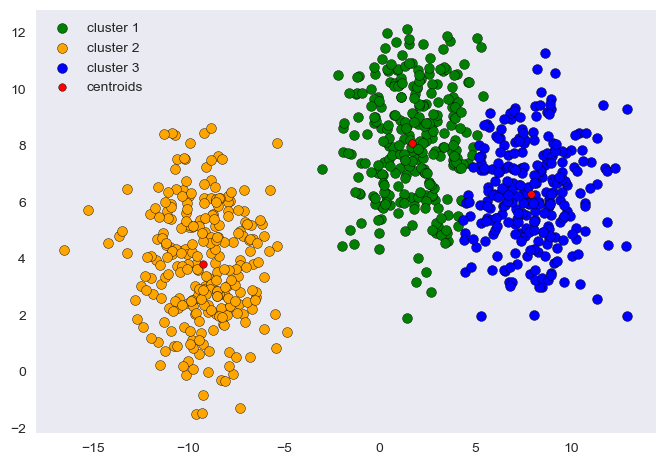

In [9]:
# plot the 3 clusters

# cluster berwarna hijau atau cluster 1
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='green', edgecolor='black',
    label='cluster 1'
)

# cluster berwarna orange atau cluster 2
plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange', edgecolor='black',
    label='cluster 2'
)

# cluster berwarna biru atau cluster 3
plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='blue', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

## Elbow Method

In [10]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    # Inertia is the sum of squared distances of samples to their closest cluster center.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

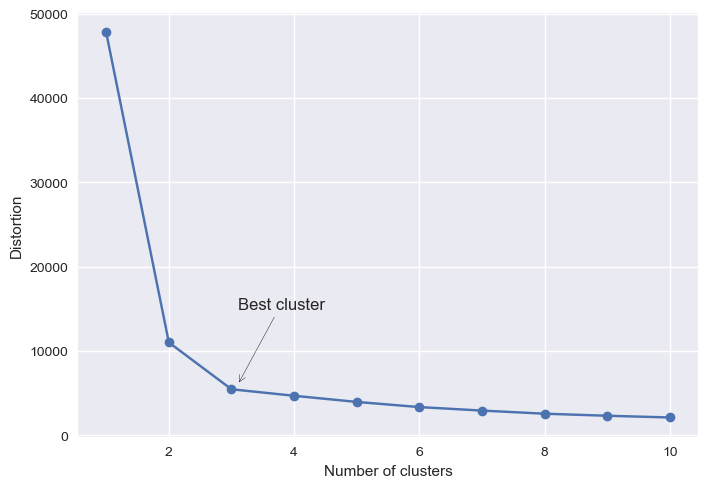

In [11]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.annotate('Best cluster', xy=(3.1, 6000), xytext=(3.1, 15000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Elbow method shows that the best K is 2 (probably 3 can be better)

# Aglomerative Clustering


## Small Data

### Generate Data

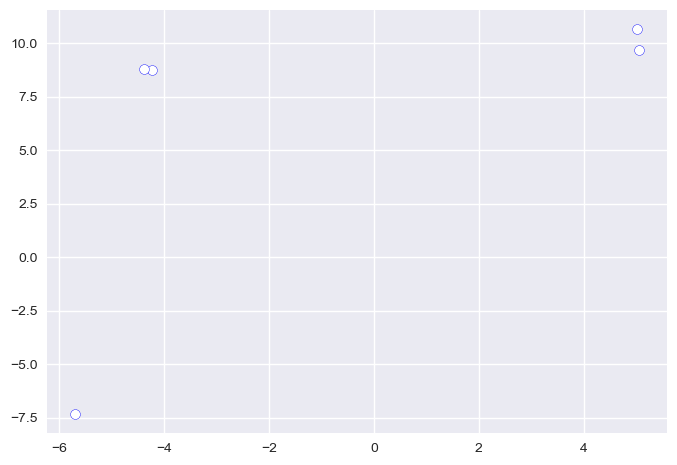

In [12]:
# create dataset
X, _ = make_blobs(n_samples=5, n_features=2,
                  centers=3, cluster_std=0.5,
                  shuffle=True, random_state=31)

# plot
plt.scatter(X[:, 0], X[:, 1], c='white', edgecolor='blue', marker='o', s=50)

plt.show()

### Model Data

In [13]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(X)

You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

### Plot Dendogram

In [14]:
pd.DataFrame({
    'fitur 1':X[:,0],
    'fitur 2':X[:,1],
    'index':list(range(0,len(X)))
})

,fitur 1,fitur 2,index
0,5.053458,9.694379,0
1,-5.692724,-7.327352,1
2,-4.238378,8.766598,2
3,5.017699,10.662078,3
4,-4.388223,8.780513,4


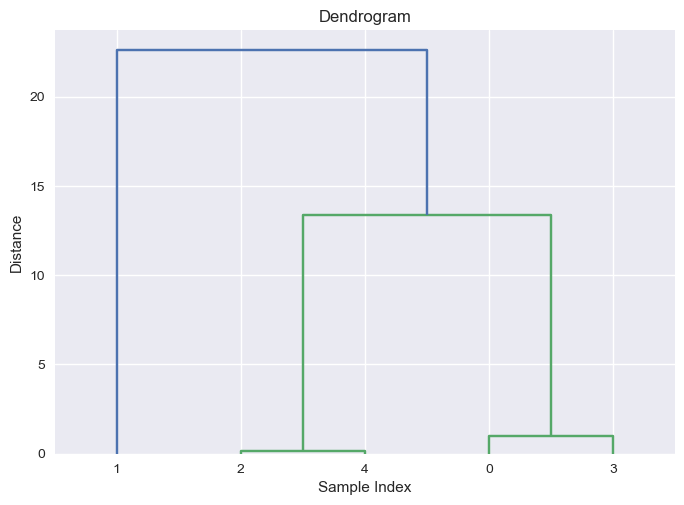

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# Generate the linkage matrix
linkage_matrix = linkage(X, method='ward')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linkage_matrix, labels=np.arange(len(X)), leaf_font_size=10)
plt.show()

### Plot Cluster

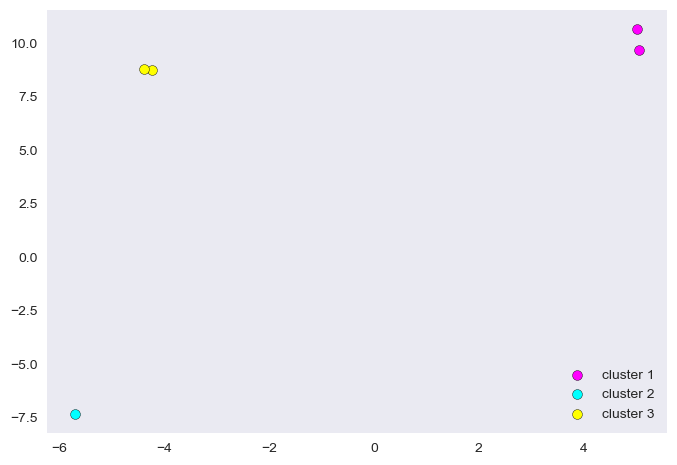

In [16]:
# plot the 3 clusters

# cluster berwarna magenta atau cluster 1
plt.scatter(
    X[y_agg == 0, 0], X[y_agg == 0, 1],
    s=50, c='magenta', edgecolor='black',
    label='cluster 1'
)

# cluster berwarna cyan atau cluster 2
plt.scatter(
    X[y_agg == 1, 0], X[y_agg == 1, 1],
    s=50, c='cyan', edgecolor='black',
    label='cluster 2'
)

# cluster berwarna kuning atau cluster 3
plt.scatter(
    X[y_agg == 2, 0], X[y_agg == 2, 1],
    s=50, c='yellow', edgecolor='black',
    label='cluster 3'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

## More Data!

### Generate Data

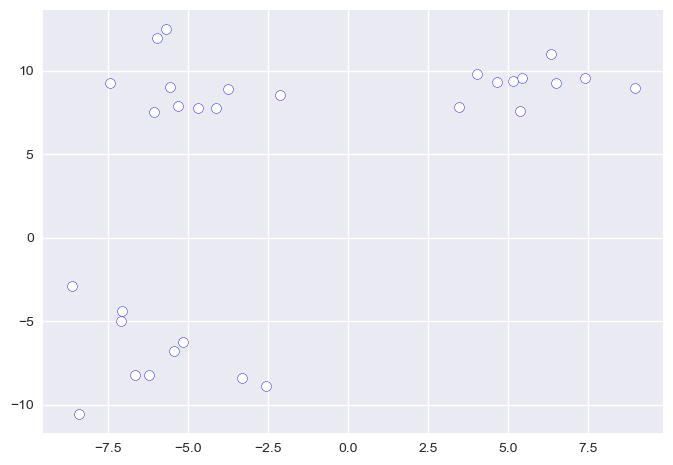

In [17]:
# create dataset
X, _ = make_blobs(n_samples=30, n_features=2,
                  centers=3, cluster_std=1.8,
                  shuffle=True, random_state=31)

# plot
plt.scatter(X[:, 0], X[:, 1], c='white', edgecolor='blue', marker='o', s=50)

plt.show()

### Model Data

In [18]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(X)

You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

### Plot Dendogram

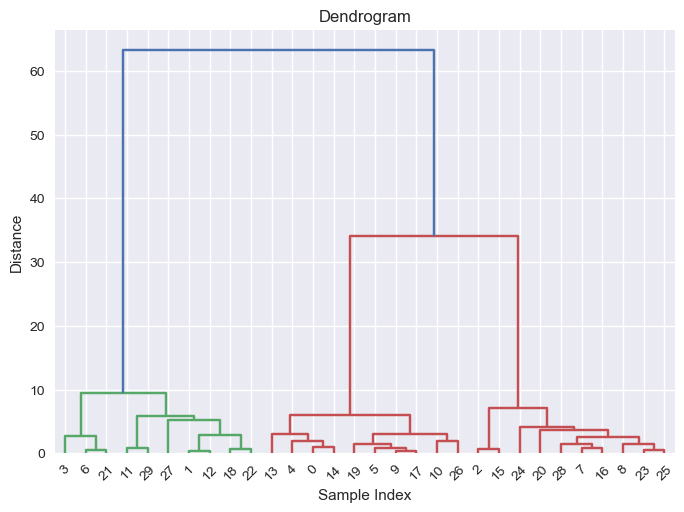

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# Generate the linkage matrix
linkage_matrix = linkage(X, method='ward')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linkage_matrix, labels=np.arange(len(X)), leaf_font_size=10)
plt.show()

### Plot Cluster

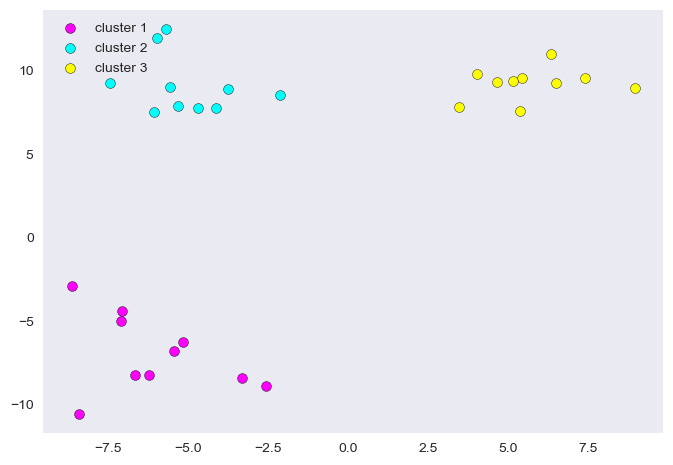

In [20]:
# plot the 3 clusters

# cluster berwarna magenta atau cluster 1
plt.scatter(
    X[y_agg == 0, 0], X[y_agg == 0, 1],
    s=50, c='magenta', edgecolor='black',
    label='cluster 1'
)

# cluster berwarna cyan atau cluster 2
plt.scatter(
    X[y_agg == 1, 0], X[y_agg == 1, 1],
    s=50, c='cyan', edgecolor='black',
    label='cluster 2'
)

# cluster berwarna kuning atau cluster 3
plt.scatter(
    X[y_agg == 2, 0], X[y_agg == 2, 1],
    s=50, c='yellow', edgecolor='black',
    label='cluster 3'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

# DBSCAN

In [21]:
plt.style.use('default')

## Generate Data

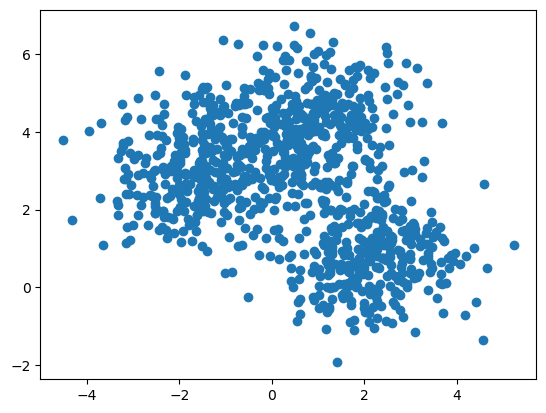

In [22]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

#plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Model Data

In [23]:
#do DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)

You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

## Plot Cluster

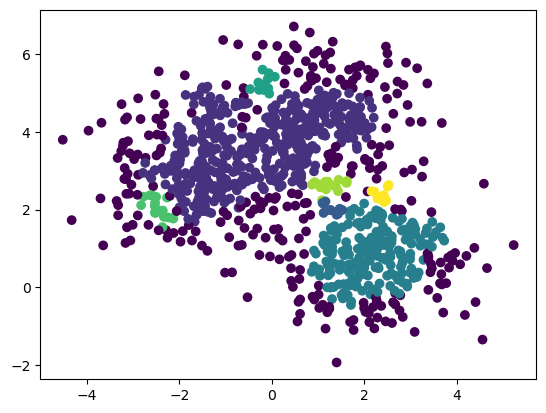

In [24]:
#plot the result
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()

## Plot lebih detail

In [25]:
y_db = dbscan.labels_

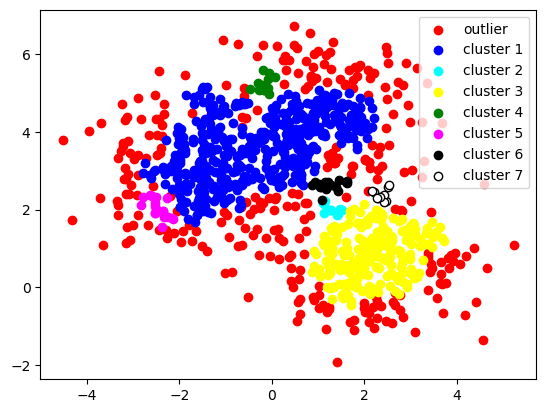

In [26]:
#plot the result
plt.scatter(X[y_db==-1,0],X[y_db==-1,1], c='red', label='outlier')
plt.scatter(X[y_db==0,0],X[y_db==0,1], c='blue', label='cluster 1')
plt.scatter(X[y_db==1,0],X[y_db==1,1], c='cyan', label='cluster 2')
plt.scatter(X[y_db==2,0],X[y_db==2,1], c='yellow', label='cluster 3')
plt.scatter(X[y_db==3,0],X[y_db==3,1], c='green', label='cluster 4')
plt.scatter(X[y_db==4,0],X[y_db==4,1], c='magenta', label='cluster 5')
plt.scatter(X[y_db==5,0],X[y_db==5,1], c='black', label='cluster 6')
plt.scatter(X[y_db==6,0],X[y_db==6,1], c='white', edgecolor='black', label='cluster 7')
plt.legend(scatterpoints=1)
plt.show()